In [11]:
from keras.models import load_model
import pandas as pd
import cv2
import numpy as np


In [32]:
import matplotlib.pyplot as plt

In [12]:
model = load_model('model.h5')

In [91]:
upside_down = images[4]

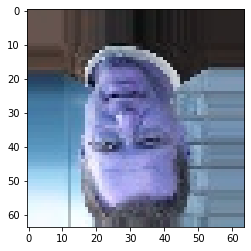

In [36]:
plt.imshow(upside_down)

In [93]:
def rotate(model,image):
    image_pred = image.reshape(1,64,64,3)
    output = model.predict(image_pred)
    value = output.argmax()          #get the index of the encoded output
    
    if value  == 1:      #right
        angle = 90

    elif value == 0:    #left
        angle = 270

    elif value == 3:    #down
        angle = 180
        
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [95]:
img = rotate(model,upside_down)

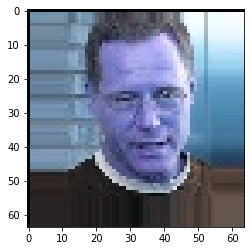

In [97]:
plt.imshow(img)